# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.
Задача: провети исследовательский анализ данных и установить параметры, влияющие на цену объектов

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель: установить параметры, влияющие на цену объектов

Задачи:
- предобработка данных
- исследовательский анализ данных

Стек: pandas, matplotlib, numpy

Ход работы:

Выводы:

## 1. Загрузка данных. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t').copy()

Изучим общую информацию о данных:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


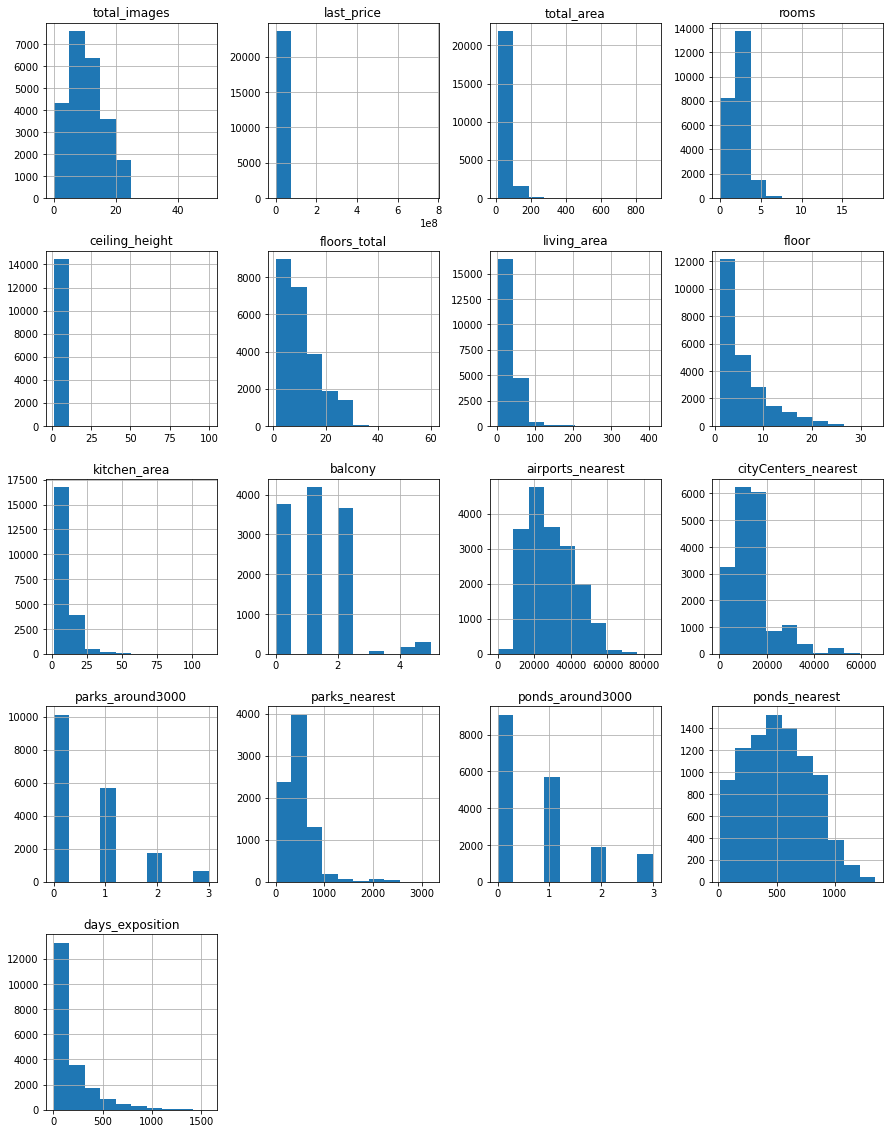

In [8]:
df.hist(figsize=(15, 20))
plt.show()

**Вывод**:
1. Наличие явных пропусков. Количество не пустых ячеек не соответствует общему количеству строк: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
2. Несоответствие содержимого типу данных столстолбца:
- тип объект - first_day_exposition  
- тип вещественное число - floors_total, balcony, days_exposition
- тип объект is_apartment   
4. Оснавная масса гистограмм имеет распределение Пуассона
5. Гистограммы отображают наличие выбросов в данных: living_area, floors_total, kitchen_area, balcony, rooms,parks_nearest, days_exposition

## 2. Предобработка данных

### 2.1 Название столбцов

Приведем название столбца `cityCenters_nearest` к змеиному регистру:

In [9]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 2.2 Пропущенные значения

Проверим пропущеннные значения в колонках:

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**is_apartment**. Предполагаем, что пропущенное значение в колонке говорит о том, что объект не является аппартаментами. Заменим Nan на False 

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

In [12]:
# Проверим тип данных:
df.dtypes['is_apartment']

dtype('bool')

**balcony**. Отсутствующие значения заменим на 0. Предполагаем, что при отсутстии балкона, данный параметр пользователь не заполнял:

In [13]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**kitchen_area**. Сгруппируем данные по количеству комнат. Пропущенные значения заполним медианой по группам:

In [14]:
df[['rooms', 'kitchen_area']].groupby('rooms')['kitchen_area'].median()

rooms
0        NaN
1       9.04
2       8.80
3       9.50
4      11.10
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [15]:
df['kitchen_area'] = df['kitchen_area'].fillna(df[['rooms', 'kitchen_area']]\
                                             .groupby('rooms')['kitchen_area'].transform('median'))
df['kitchen_area'].isna().sum()

197

**living_area** Сгруппируем данные по количеству комнат. Пропущенные значения заполним медианой по группам

In [16]:
df[['rooms', 'living_area']].groupby('rooms')['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [17]:
df['living_area'] = df['living_area'].fillna(df[['rooms', 'living_area']]\
                                             .groupby('rooms')['living_area'].transform('median'))
df['living_area'].isna().sum()

0

**ceiling_height**. Пропуски заполним медианным зачение по диапазону от 2.4 до 5 м. Испульзуем данный диапозон высот потолков, как наиболее адекватный.

In [18]:
# получим уникальные значения в колонке:
sorted(df['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


In [19]:
#Приведем значения к метрам. Предполагаем, что ошибки допущены пользователем при заполнении данных:
df['ceiling_height'] = df['ceiling_height']\
.replace({20.: 2.0, 22.6: 2.26, 24.: 2.4, 25.: 2.5, 26.: 2.6, 27.:2.7, 27.5: 2.75, 32: 3.2})

In [20]:
df[(df['ceiling_height'] >= 2.4) & (df['ceiling_height'] <= 5.0)]['ceiling_height'].median()

2.65

In [21]:
df['ceiling_height'] = df['ceiling_height'].fillna(df[(df['ceiling_height'] >= 2.4) & (df['ceiling_height'] <= 5.0)]['ceiling_height'].median())
df['ceiling_height'].value_counts()

2.65    9871
2.50    3522
2.60    1647
2.70    1582
3.00    1112
        ... 
3.76       1
5.20       1
2.89       1
2.26       1
4.65       1
Name: ceiling_height, Length: 176, dtype: int64

In [22]:
df['ceiling_height'].isna().sum()

0

**floors_total**. Пропуски остаивм без изменений, так как данные являются числовым и потребуются в дальнейшем анализе

**locality_name**. Пропущенные значения заменим на `unknown`

In [24]:
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].isna().sum()

0

**parks_nearest**

1. Если значение в столбце parks_around3000 отсутствует, предполагаем что парка нет. Выполняем замену в столбце parks_around3000 на 0
2. Если значение в столбце parks_around3000 равно 0, Выполняем замену в столбце parks_nearest на 0

In [25]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

In [26]:
df['parks_nearest'] = df[df['parks_around3000'] == 0]['parks_nearest'].fillna(0)
df['parks_nearest'].isna().sum()

8075

Остальные пропуски оставим без изменений

**ponds_nearest** 
1. Если значение в столбце pounds_around3000 отсутствует, предполагаем что парка нет. Выполняем замену в столбце parks_around3000 на 0
2. Если значение в столбце pounds_around3000 равно 0, Выполняем замену в столбце pounds_nearest на 0

In [27]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

In [28]:
df['ponds_nearest'] = df[df['ponds_around3000'] == 0]['ponds_nearest'].fillna(0)
df['ponds_nearest'].isna().sum()

9110

Отсальные пропуски значений оставим без изменений

In [29]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             197
balcony                    0
locality_name              0
airports_nearest        5542
city_centers_nearest    5519
parks_around3000           0
parks_nearest           8075
ponds_around3000           0
ponds_nearest           9110
days_exposition         3181
dtype: int64

**cityCenters_nearest, airports_nearest**
Проверим количество прпущенных значений с привязкой по населенным пунктам:

In [30]:
len(df[df['city_centers_nearest'].isna()]['locality_name'].unique())

346

In [31]:
len(df[df['airports_nearest'].isna()]['locality_name'].unique())

345

In [32]:
len(df['locality_name'].unique())

365

В колонках city_сenters_nearest, airports_nearest оставим пропуски значений. Предплагаю, что пользватель принебрег этими данными при заполнении объявлений

### 2.3 Приведение типов данных

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**first_day_exposition** Переведем в формат datetime с точнстью до дней

In [34]:
df['first_day_exposition'] = pd.to_datetime(  
    df['first_day_exposition'], format='%Y.%m.%d')
df.dtypes['first_day_exposition']

dtype('<M8[ns]')

In [35]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,NaN,2.0,NaN,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,NaN,2.0,NaN,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,NaN,3.0,NaN,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,NaN,1.0,NaN,121.0


**balcony**

In [36]:
df['balcony'] = df['balcony'].astype(int)
df.dtypes['balcony']

dtype('int64')

**is_apartment**

In [37]:
df.dtypes['is_apartment']

dtype('bool')

### 2.4 Дубликаты

Проверим на явные дубликаты. Приведем стороки к нижнему регистру. Заменим 'ё' на 'е'

In [38]:
df['locality_name'] = df['locality_name'].str.lower()

In [39]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [40]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим на неявные:

In [41]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [42]:
len(df['locality_name'].unique())

331

Устраним неявные дубликаты



In [43]:
to_replace = {r'(\b)поселок городского типа(\b)':r'\1городской поселок\2', r'(\b)поселок при железнодорожной станции(\b)': r'\1поселок станции\2'}
df['locality_name'] = df['locality_name'].replace(to_replace, regex=True)
len(df['locality_name'].unique())

322

In [44]:
to_locality = [
    ['поселок мурино', 'мурино'],
    ['деревня русско', 'село русско-высоцкое'],
    ['деревня федоровское', 'поселок городского типа федоровское'],
    ['кудрово', 'деревня кудрово'],
    ['поселок гарболово', 'деревня гарболово'],
    ['поселок рябово', 'поселок городского типа рябово']
]
df['locality_name'] = df['locality_name'].replace(to_locality, regex=True)
len(df['locality_name'].unique())

312

проверим на явные дубликаты:

In [45]:
df.duplicated().sum()

0

### 2.5 Обработка и удаление аномалий

In [46]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23502.000000,23699.000000,18157.000000,18180.000000,23699.000000,15624.000000,23699.000000,14589.0,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.702518,10.673824,34.321982,5.892358,10.464501,0.591080,28793.672193,14191.277833,0.469049,0.797299,0.590911,0.0,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.679234,6.597173,21.700627,4.885249,5.664289,0.959298,12630.880622,8608.386210,0.748534,49.840386,0.883999,0.0,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18585.000000,9238.000000,0.000000,0.000000,0.000000,0.0,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26726.000000,13098.500000,0.000000,0.000000,0.000000,0.0,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37273.000000,16293.000000,1.000000,0.000000,1.000000,0.0,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,0.0,1580.000000


В колонках 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms' присутствуют явные выбросы. Уберем выбросы методом quantile()

In [47]:
def quantile_filtered(data, columns):
    for row in columns:
        data = data[(data[row] <= data[row].quantile(0.995))\
              & (data[row] >= data[row].quantile(0.005))]
    return data    

In [48]:
quantile_columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms'] #rooms отдельно, проверить на аппартам
df_filtered = quantile_filtered(df, quantile_columns)
df_filtered.shape

(22564, 22)

Отфильтруем по высоте потолков:

In [49]:
df_filtered = df_filtered[(df_filtered['ceiling_height'] >= 2.4)
                          & (df_filtered['ceiling_height'] <= 5.0)]
df_filtered.shape

(22535, 22)

Проверим процент удаленных строк:

In [50]:
(df.shape[0] - df_filtered.shape[0])/(df.shape[0])

0.049115996455546644

Проверим гистограммы по отфильтрованным колонкам:

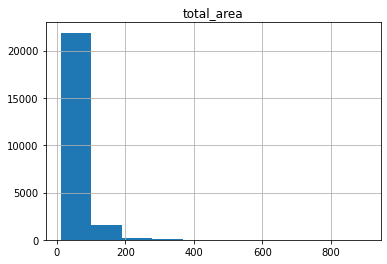

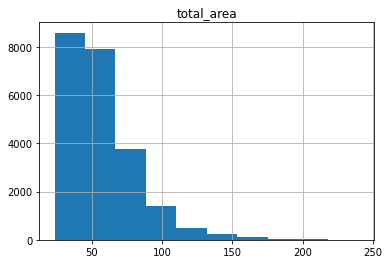

In [51]:
df.hist('total_area')
df_filtered.hist('total_area')
plt.show()

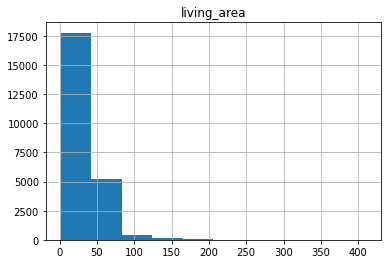

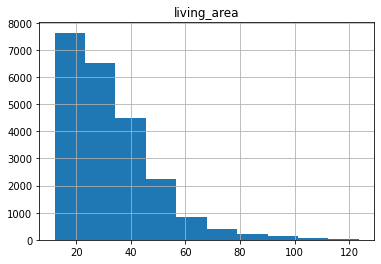

In [52]:
df.hist('living_area')
df_filtered.hist('living_area')
plt.show()

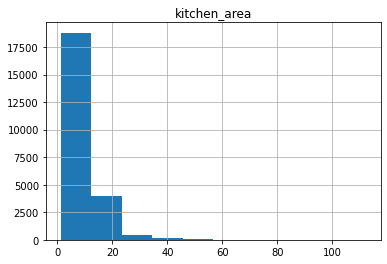

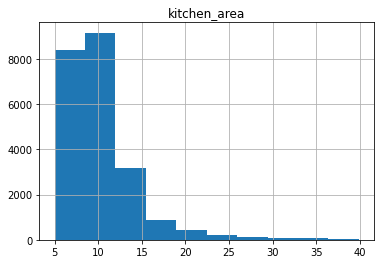

In [53]:
df.hist('kitchen_area')
df_filtered.hist('kitchen_area')
plt.show()

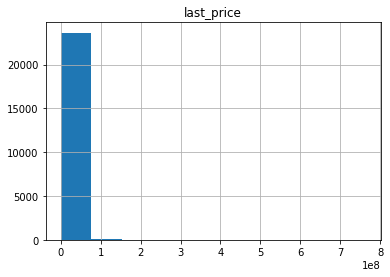

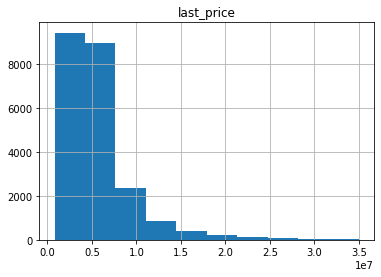

In [54]:
df.hist('last_price')
df_filtered.hist('last_price')
plt.show()

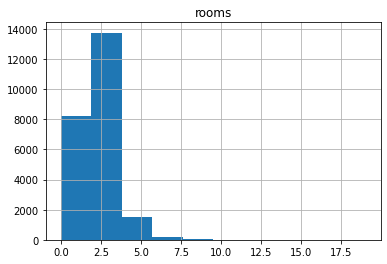

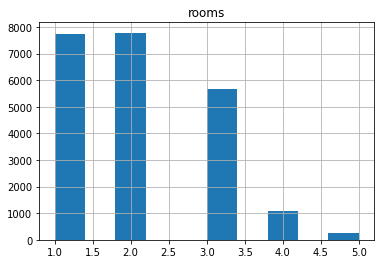

In [55]:
df.hist('rooms')
df_filtered.hist('rooms')
plt.show()

**Вывод:** В гистограммах по отфильтрованным колонкам распределение данных стремится к распределению Пуассона. При фильтрации удалено 5% строк. Считаю результат приемлимым. 

## 3. Генерация новых признаков

#### Цена одного квадратного метра:

In [56]:
df_filtered['price_meter2'] = df_filtered['last_price'] / df_filtered['total_area']
df_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,NaN,2.0,NaN,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,NaN,2.0,NaN,558.0,92785.714286
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,городской поселок янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0,95065.789474
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,...,2,санкт-петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN,110544.692737


#### День недели, мясяц и год публикации объявления

In [57]:
df_filtered['day_exposition'] = df_filtered['first_day_exposition'].dt.weekday

In [58]:
df_filtered['month_exposition'] = df_filtered['first_day_exposition'].dt.month

In [59]:
df_filtered['year_exposition'] = df_filtered['first_day_exposition'].dt.year

In [60]:
df_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter2,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,NaN,2.0,NaN,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,NaN,2.0,NaN,558.0,92785.714286,3,8,2015
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,0.0,0.0,0.0,0.0,55.0,95065.789474,0,9,2018
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,...,11634.0,0.0,0.0,0.0,0.0,NaN,110544.692737,3,4,2019


#### Тип этажа квартиры

In [61]:
def categorize_floor(fl, total_fl):
    if fl == 1:
        return 'первый'
    elif fl == total_fl:
        return 'последний'
    else:
        return 'другой'

df_filtered['floor_type'] = df_filtered.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis=1)

In [62]:
df_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter2,day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,NaN,2.0,NaN,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,NaN,2.0,NaN,558.0,92785.714286,3,8,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0.0,0.0,0.0,0.0,55.0,95065.789474,0,9,2018,другой
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.5,22,False,...,0.0,0.0,0.0,0.0,NaN,110544.692737,3,4,2019,другой


#### Расстояние до центра города в километрах 

In [63]:
df_filtered['city_centers_km'] = (df_filtered['city_centers_nearest'] / 1000).apply(np.floor)

## 4. Исследовательский анализ данных

#### Изучение данных

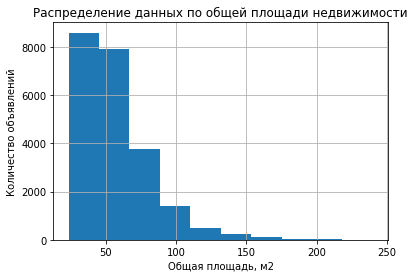

In [64]:
df_filtered['total_area'].hist()
plt.title('Распределение данных по общей площади недвижимости')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости общей площадью от 20 до 70  м кв 

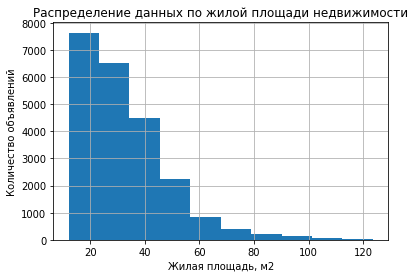

In [65]:
df_filtered['living_area'].hist()
plt.title('Распределение данных по жилой площади недвижимости')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости c жилой площадью от 10 до 30  м кв 

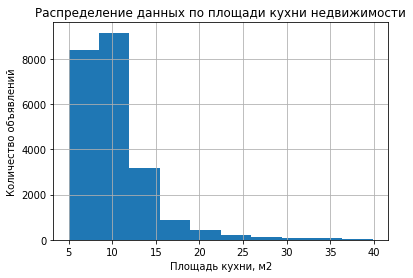

In [66]:
df_filtered['kitchen_area'].hist()
plt.title('Распределение данных по площади кухни недвижимости')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости c площадью кухни от 5 до 12  м кв 

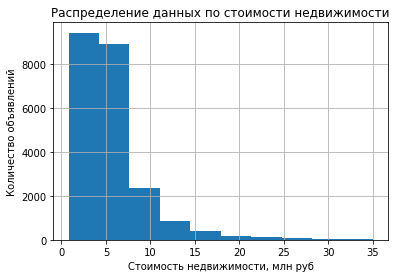

In [67]:
(df_filtered['last_price']/1000000).hist()
plt.title('Распределение данных по стоимости недвижимости')
plt.xlabel('Стоимость недвижимости, млн руб')
plt.ylabel('Количество объявлений')
plt.show()

основная масса недвижимости со стоимостью от 1 000 000 р до 7 500 000 р.

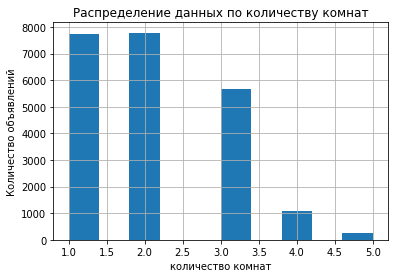

In [68]:
df_filtered['rooms'].hist()
plt.title('Распределение данных по количеству комнат')
plt.xlabel('количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости однокомнатные, двухкомнатные и трехкомнатные квартиры.

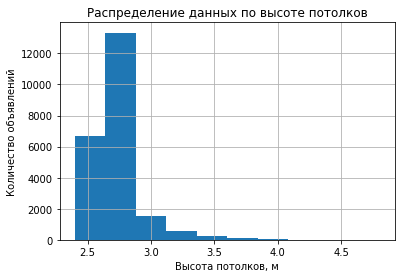

In [69]:
df_filtered['ceiling_height'].hist()
plt.title('Распределение данных по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости с высотой потолков от 2,65 м до 2,75 м

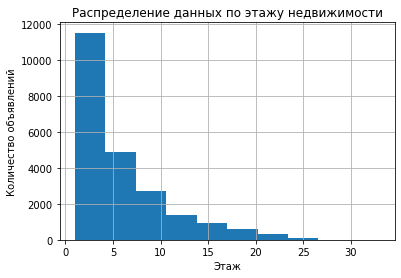

In [70]:
df_filtered['floor'].hist()
plt.title('Распределение данных по этажу недвижимости')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса недвижимости с 2 по 4 этаж.

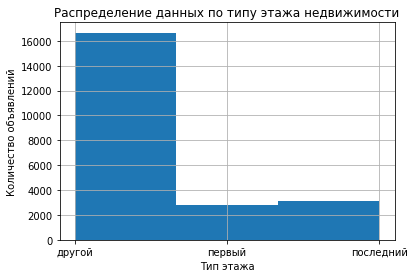

In [71]:
df_filtered['floor_type'].hist(bins=3)     
plt.title('Распределение данных по типу этажа недвижимости')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()

Оснавная масса нежвижимости расположена не на первом и не на последнем этажах.

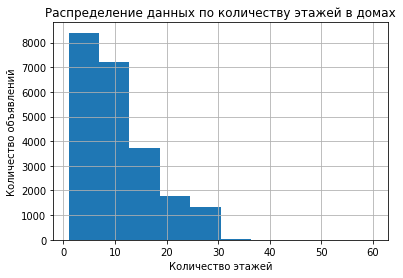

In [72]:
df_filtered['floors_total'].hist()
plt.title('Распределение данных по количеству этажей в домах')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

Оснавная масса неддвижимости представлена в домах от 1 до 12 этажей.

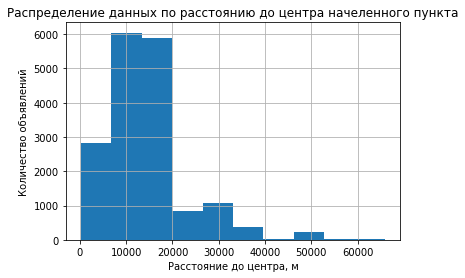

In [73]:
df_filtered['city_centers_nearest'].hist()
plt.title('Распределение данных по расстоянию до центра начеленного пункта')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество объявлений')
plt.show()

Недвижиомсть в основном расположена на расстоянии от центра населенного пункта от 8 до 20 км. 

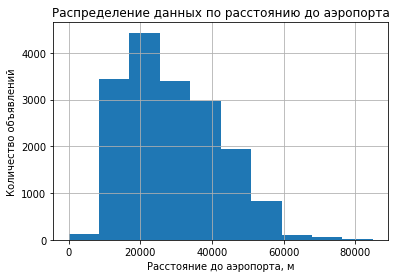

In [74]:
df_filtered['airports_nearest'].hist()
plt.title('Распределение данных по расстоянию до аэропорта')
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество объявлений')
plt.show()

Расстояние до аэропорта в основном составляет от 8 до 25 км.

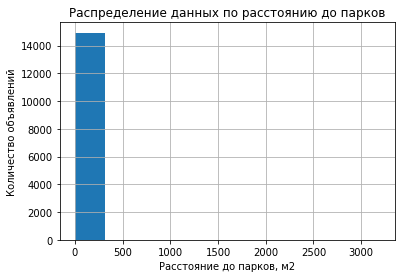

In [75]:
df_filtered['parks_nearest'].hist()
plt.title('Распределение данных по расстоянию до парков')
plt.xlabel('Расстояние до парков, м2')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса парков расположена на расстоянии до 300 до 600 м.

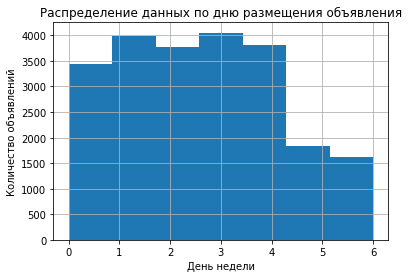

In [76]:
df_filtered['day_exposition'].hist(bins=7)
plt.title('Распределение данных по дню размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

В основном объявления выкладывают c понедельника по пятницу.

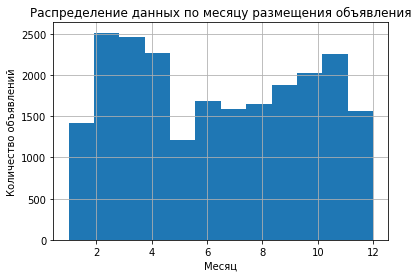

In [77]:
df_filtered['month_exposition'].hist(bins=12)
plt.title('Распределение данных по месяцу размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений выкладывают с февраля по май, с сентября по ноябрь включительно.

#### Анализ скорости продажи квартир

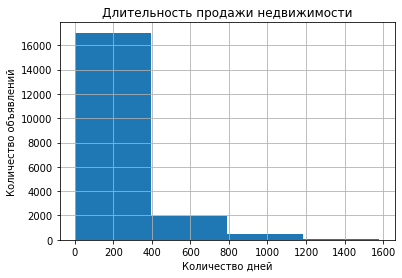

In [78]:
df_filtered['days_exposition'].hist(bins=4)
plt.title('Длительность продажи недвижимости')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Вычислим медиану и среднее значение дней продажи по населенным пунктам:

In [79]:
df_filtered_group = df_filtered.groupby('locality_name')['days_exposition'].agg(['mean', 'median'])

Среднее количество дней продажи недвижимости от среднего по населенным пунктам:

In [80]:
df_filtered_group['mean'].mean()

191.20398241161078

Медианное количество дней продажи недвижимости от медианы по населенным пунктам:

In [81]:
df_filtered_group['median'].median()

109.0

Text(0, 0.5, 'Количество объявлений')

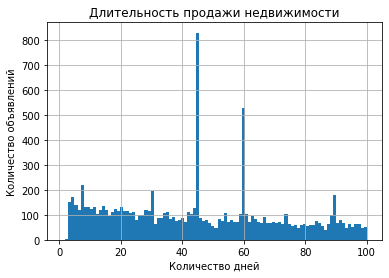

In [82]:
df_filtered[df_filtered['days_exposition'] <= 100]['days_exposition'].hist(bins=100)
plt.title('Длительность продажи недвижимости')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')

Наблюдается два пика 45 и 60 дней. Данные можно принять за быстрое время продажи.

**Вывод:** Проанализировав гистограмму распределения дней продажи, среднее и медианные значения, получаем:

    - обычное время прождажи 121 день
    - быстрые продажи менее 60 дней
    - длительные продажи более 400 дней

#### Изучение факторов влияющих на стоимость объекта недвижимости

**Общая площадь**

In [83]:
df_filtered['last_price'].corr(df_filtered['total_area'])

0.77092658256786

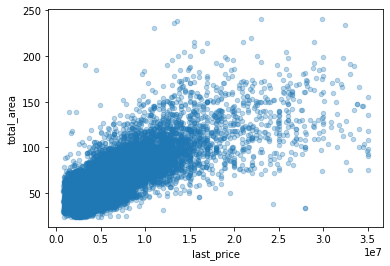

In [84]:
df_filtered.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.show()

Прослеживается прямая зависимость стоимости квартиры от общей площади

**Жилая площадь**

In [85]:
df_filtered['last_price'].corr(df_filtered['living_area'])

0.6369221194737866

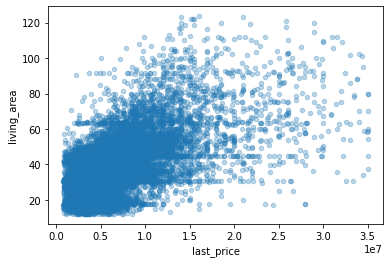

In [86]:
df_filtered.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
plt.show()

Прослеживается прямая зависимость стоимости квартиры от жилой площади

**Площадь кухни**

In [87]:
df_filtered['last_price'].corr(df_filtered['kitchen_area'])

0.5556750862572799

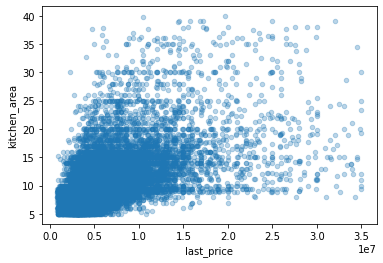

In [88]:
df_filtered.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
plt.show()

Прослеживается зависимость стоимости недвижимости от площади кухни.

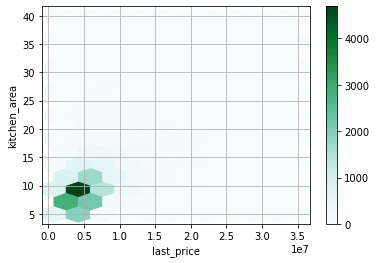

In [89]:
df_filtered.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=(10, 8), sharex=False, grid=True)
plt.show()

В большей степени зависимость прослеивается в диапазоне стоимости недвижиомсти от 2,5 до 7 млр при площади кухни 8 до 11 м кв.

**Количество комнат**

In [90]:
df_filtered['last_price'].corr(df_filtered['rooms'])

0.47176246843182096

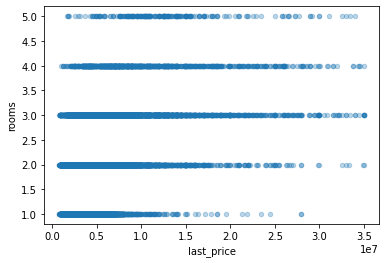

In [91]:
df_filtered.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
plt.show()

Зависимость стоимости недвижимости от количества комнат не прослеживается. Недвижимость может иметь равную стоимость как при двух комнатах, так и при четырех. Выделяется недвижимость с одной комнатой: имеют меньший разброс в стоимости.

**Этаж расположения недвижимости**

In [92]:
df_filtered['last_price'].corr(df_filtered['floor'])

0.08477495958126612

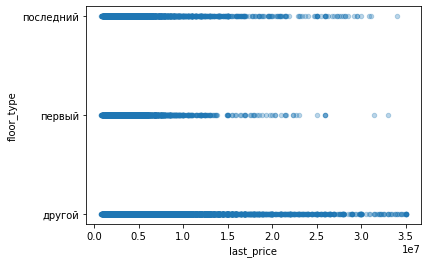

In [93]:
df_filtered.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.3)
plt.show()

Зависомость стоимости недвижимости от этажа не прослеживается.

**Дата размещения объявления**

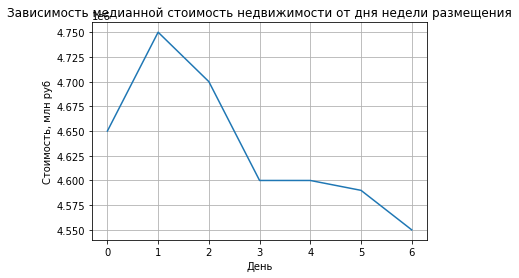

In [94]:
df_filtered.groupby('day_exposition')['last_price'].median().plot(grid=True)
plt.title('Зависимость медианной стоимость недвижимости от дня недели размещения')
plt.xlabel('День')
plt.ylabel('Стоимость, млн руб')
plt.show()

Во вторник размещаются объявления по высокой стоимости, в воскресенье самой низкой стоимости.

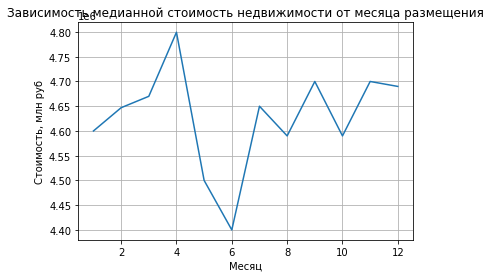

In [95]:
df_filtered.groupby('month_exposition')['last_price'].median().plot(grid=True)
plt.title('Зависимость медианной стоимость недвижимости от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, млн руб')
plt.show()

Объявления на дорогую недвижимость размещается в апреле, спад в июне.

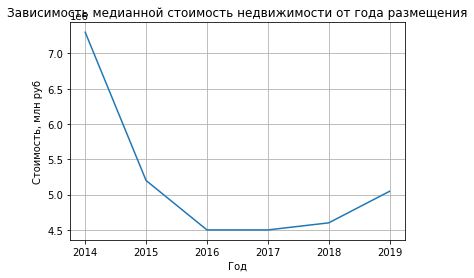

In [96]:
df_filtered.groupby('year_exposition')['last_price'].median().plot(grid=True)
plt.title('Зависимость медианной стоимость недвижимости от года размещения')
plt.xlabel('Год')
plt.ylabel('Стоимость, млн руб')
plt.show()

В период с 2014 по 2016 год наблюдается значительный спад стоимости продаваемой недвижимости. C 2017 постепенное повышение стоимости.

**Вывод:** наибольшая корреляция стоимости недвижимсти наблюдается по отношению к площади недвижимости. Объявления с наиболее дорогой недвижимостью размещаются по вторникам, с наименьшей по воскресеньям. С 2014 по 2016 гг наблюдался значительный спад в стоимости продаваемой недвижимости.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для анализа средней стоимости квадратного метра в 10 населеннных пунктах с наибольшим числом, сгруппируем данные по населенным пунктам и рассчитаем среднее значение

In [97]:
top_price_10 = df_filtered.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist()

In [98]:
df_filtered_top = df_filtered[df_filtered['locality_name'].isin(top_price_10)]

In [99]:
df_filtered_top = df_filtered_top[~df_filtered_top['locality_name'].isna()]
df_filtered_top['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'петергоф', 'пушкин',
       'поселок парголово', 'колпино', 'гатчина', 'выборг', 'всеволожск',
       'сестрорецк'], dtype=object)

In [100]:
top_price_meter2 = df_filtered_top.pivot_table(index='locality_name', values='price_meter2', aggfunc='mean')['price_meter2'].sort_values(ascending=False)

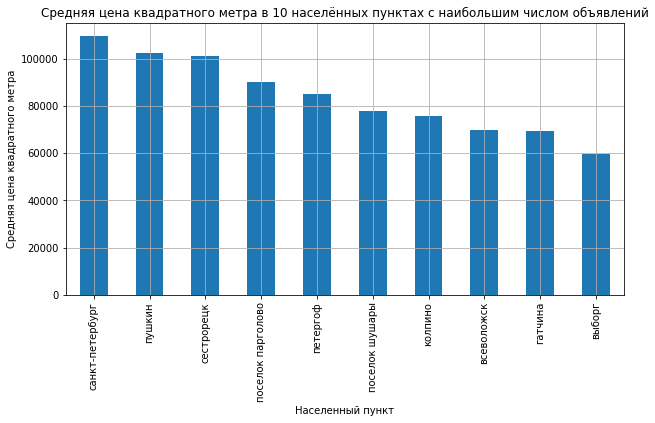

In [101]:
top_price_meter2.plot(figsize=(10,5), grid=True, kind='bar')
plt.title('Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена квадратного метра')
plt.show()

In [102]:
top_price_meter2.sort_values(ascending=False)

locality_name
санкт-петербург      109653.812777
пушкин               102347.235445
сестрорецк           101351.240840
поселок парголово     90049.096518
петергоф              85080.049050
поселок шушары        77983.575119
колпино               75621.989899
всеволожск            69653.757850
гатчина               69269.869947
выборг                59459.293649
Name: price_meter2, dtype: float64

**Вывод:** Наибольшая средняя цена квадратного метра среди 10 городов наблюдается в г. Санкт-Петербург. Наименьшая средняя стоимость квадратного метра - г. Выборг.

#### Анализ стоимости объектов недвижимости в зависимости от расстояния до центра города Санкт-Петербурга

Для анализа зависимости выполним срез данных погороду Санкт-петербург, сгруппируем данные по расстоянию до центра города и найдем среднюю стоимость недвижимости:

In [103]:
spb_filtered = df_filtered[df_filtered['locality_name'] == 'санкт-петербург']
spb_filtered.shape

(15664, 28)

In [104]:
spb = spb_filtered.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean')
spb.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, 0.0 to 29.0
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   last_price  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


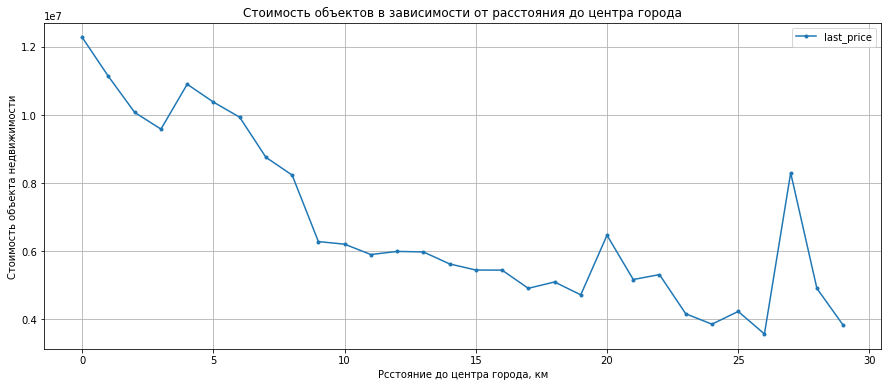

In [105]:
spb.plot(figsize=(15,6),grid=True, style='.-')
plt.title('Стоимость объектов в зависимости от расстояния до центра города')
plt.xlabel('Рсстояние до центра города, км')
plt.ylabel('Стоимость объекта недвижимости')
plt.show()

**Вывод:** Стоимость объектов напрямую зависит от расстояния до центра города. Наибольшая зависимость наблюдается на расстоянии до 8 км. От 8 до 18 км стоимость объектов примерно одинакова. На 26-27 км от центра наблюдается значительный скачок в стоимости недвижимости. Предполагаю, на данном расстоянии от центра города расположен район, интересный с точки зрения коммерции.

### Общий вывод

В ходе проведения анализа данных, полученны слдедующие результаты:
1. Оснавная масса недвижимости, представленная на рынке:
    - Общая площадь от 20 до 70 м кв
    - Жилая площадь от 10 до 30 м кв
    - Площадь кухни от 5 до 12 м кв
    - Стоимость от 1 000 000 р до 7 500 000 р
    - Однокомнатные, двухкомнатные и трехкомнатные квартиры.
    - Высота потолков от 2,65 м до 2,75 м
    - С 2 по 4 этаж.
    - Не первый и не последний этажи.
    - Дома от 1 до 12 этажей.
    - Расстоянии от центра населенного пункта от 8 до 20 км.
    - Расстояние до аэропорта от 8 до 25 км.
    - Парки расположены на расстоянии от 300 до 600 м
2. Время публикации объявлений:
    - Чаще выкладывают объявления c понедельника по пятницу.
    - Наибольшая активность с февраля по май, с сентября по ноябрь включительно.
3. Факторы влияющие на стоимость квартиры:
    - Общая площадь
    - Жилая площадь
    - Площадь кухни
4. Влияние даты размещения объявления на стоимость недвижимости:
    - В зависимости от дня недели: наибольшая стоимость при публикации по вторникам, наименьшая по воскресеньям
    - В зависимости от месяца в году: наибольшая стоимость при публикации в апреле, наименьшая в июне
5. С 2014 по 2016 гг наблюдался значительный спад в стоимости продаваемой недвижимости
5. Длительность продажи недвижимости:
    - обычная 121 день
    - быстрая менее 60 дней
    - длительная более 400 дней
6. В Санкт-Петербурге отмечается самая высокая стоимость квадратного метра
7. В Cанкт-Петербурге на стоимость недвижимость, в большей степени, влияет расположение относительно центра города.